# 📊 Evaluación de Modelos
## Fraud Detector para Transacciones Bancarias

Este notebook evalúa el rendimiento de los modelos entrenados, optimiza umbrales de decisión y genera reportes detallados.

**Objetivos:**
- Cargar modelos entrenados y evaluar performance
- Optimizar umbrales de decisión
- Generar métricas de evaluación detalladas
- Crear visualizaciones de rendimiento
- Guardar todos los resultados organizadamente

## 1. Importación de Librerías y Configuración

In [8]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score,
    f1_score, precision_score, recall_score, accuracy_score
)
import joblib

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utilidades
import os
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Crear directorios de resultados
results_dirs = [
    '../results/figures/metrics',
    '../results/figures/curves',
    '../results/figures/confusion_matrices',
    '../results/tables/metrics',
    '../results/tables/thresholds',
    '../results/reports'
]

for directory in results_dirs:
    os.makedirs(directory, exist_ok=True)

print("📚 Librerías importadas y directorios creados exitosamente!")
print(f"📁 Directorios de resultados: {len(results_dirs)} creados")

📚 Librerías importadas y directorios creados exitosamente!
📁 Directorios de resultados: 6 creados


## 2. Carga de Datos y Modelos

In [9]:
# Cargar datos de prueba
print("📥 CARGANDO DATOS DE PRUEBA")
print("=" * 30)

X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')['Class']

print(f"✅ Datos de prueba cargados: {X_test.shape}")
print(f"📊 Distribución en test: {y_test.value_counts().to_dict()}")

# Cargar modelos entrenados (pipelines completos)
print("\n🤖 CARGANDO MODELOS ENTRENADOS")
print("=" * 35)

model_names = ['logistic_regression', 'random_forest', 'lightgbm']
models = {}

for model_name in model_names:
    try:
        model_path = f'../models/{model_name}_best_model.joblib'
        models[model_name] = joblib.load(model_path)
        print(f"✅ {model_name} cargado exitosamente")
    except FileNotFoundError:
        print(f"❌ No se encontró el modelo {model_name}")

print(f"\n📋 Modelos disponibles: {list(models.keys())}")
print("💡 Los modelos son pipelines completos (preprocessor + classifier)")

📥 CARGANDO DATOS DE PRUEBA
✅ Datos de prueba cargados: (56746, 30)
📊 Distribución en test: {0: 56651, 1: 95}

🤖 CARGANDO MODELOS ENTRENADOS
✅ logistic_regression cargado exitosamente
✅ random_forest cargado exitosamente
✅ lightgbm cargado exitosamente

📋 Modelos disponibles: ['logistic_regression', 'random_forest', 'lightgbm']
💡 Los modelos son pipelines completos (preprocessor + classifier)
✅ Datos de prueba cargados: (56746, 30)
📊 Distribución en test: {0: 56651, 1: 95}

🤖 CARGANDO MODELOS ENTRENADOS
✅ logistic_regression cargado exitosamente
✅ random_forest cargado exitosamente
✅ lightgbm cargado exitosamente

📋 Modelos disponibles: ['logistic_regression', 'random_forest', 'lightgbm']
💡 Los modelos son pipelines completos (preprocessor + classifier)


## 3. Predicciones y Métricas Básicas

In [10]:
# Generar predicciones para todos los modelos
print("🔮 GENERANDO PREDICCIONES")
print("=" * 30)

predictions = {}
probabilities = {}

for model_name, pipeline in models.items():
    try:
        # Predicciones binarias (umbral 0.5)
        y_pred = pipeline.predict(X_test)
        # Probabilidades de clase positiva
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        
        predictions[model_name] = y_pred
        probabilities[model_name] = y_prob
        
        print(f"✅ {model_name}: {len(y_pred)} predicciones generadas")
    except Exception as e:
        print(f"❌ Error en {model_name}: {e}")

print(f"\n📊 Predicciones generadas para {len(predictions)} modelos")

🔮 GENERANDO PREDICCIONES
✅ logistic_regression: 56746 predicciones generadas
✅ random_forest: 56746 predicciones generadas
✅ random_forest: 56746 predicciones generadas
✅ lightgbm: 56746 predicciones generadas

📊 Predicciones generadas para 3 modelos
✅ lightgbm: 56746 predicciones generadas

📊 Predicciones generadas para 3 modelos


In [11]:
# Calcular métricas básicas
print("📈 MÉTRICAS BÁSICAS (Umbral 0.5)")
print("=" * 35)

basic_metrics = {}

for model_name in predictions.keys():
    y_pred = predictions[model_name]
    y_prob = probabilities[model_name]
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    basic_metrics[model_name] = metrics
    
    print(f"\n🤖 {model_name.upper()}:")
    for metric, value in metrics.items():
        print(f"   {metric.upper()}: {value:.4f}")

# Crear DataFrame de métricas
metrics_df = pd.DataFrame(basic_metrics).T
metrics_df = metrics_df.round(4)

print("\n📊 COMPARACIÓN DE MODELOS:")
display(metrics_df)

📈 MÉTRICAS BÁSICAS (Umbral 0.5)

🤖 LOGISTIC_REGRESSION:
   ACCURACY: 0.9896
   PRECISION: 0.1233
   RECALL: 0.8526
   F1: 0.2154
   ROC_AUC: 0.9608
   PR_AUC: 0.7056

🤖 RANDOM_FOREST:
   ACCURACY: 0.9995
   PRECISION: 0.9024
   RECALL: 0.7789
   F1: 0.8362
   ROC_AUC: 0.9562
   PR_AUC: 0.8053

🤖 LIGHTGBM:
   ACCURACY: 0.9995
   PRECISION: 0.9036
   RECALL: 0.7895
   F1: 0.8427
   ROC_AUC: 0.9469
   PR_AUC: 0.7947

📊 COMPARACIÓN DE MODELOS:

🤖 LIGHTGBM:
   ACCURACY: 0.9995
   PRECISION: 0.9036
   RECALL: 0.7895
   F1: 0.8427
   ROC_AUC: 0.9469
   PR_AUC: 0.7947

📊 COMPARACIÓN DE MODELOS:


,accuracy,precision,recall,f1,roc_auc,pr_auc
logistic_regression,0.9896,0.1233,0.8526,0.2154,0.9608,0.7056
random_forest,0.9995,0.9024,0.7789,0.8362,0.9562,0.8053
lightgbm,0.9995,0.9036,0.7895,0.8427,0.9469,0.7947


## 4. Optimización de Umbrales

In [12]:
# Función para optimizar umbrales
def optimize_threshold(y_true, y_prob, metric='f1'):
    """Optimiza el umbral basado en una métrica específica"""
    thresholds = np.arange(0.1, 0.9, 0.01)
    scores = []
    
    for threshold in thresholds:
        y_pred_thresh = (y_prob >= threshold).astype(int)
        
        if metric == 'f1':
            score = f1_score(y_true, y_pred_thresh)
        elif metric == 'precision':
            score = precision_score(y_true, y_pred_thresh)
        elif metric == 'recall':
            score = recall_score(y_true, y_pred_thresh)
        
        scores.append(score)
    
    best_idx = np.argmax(scores)
    best_threshold = thresholds[best_idx]
    best_score = scores[best_idx]
    
    return best_threshold, best_score, thresholds, scores

print("🎯 OPTIMIZACIÓN DE UMBRALES")
print("=" * 35)

optimized_thresholds = {}
metrics_to_optimize = ['f1', 'precision', 'recall']

for model_name in probabilities.keys():
    y_prob = probabilities[model_name]
    optimized_thresholds[model_name] = {}
    
    print(f"\n🤖 {model_name.upper()}:")
    
    for metric in metrics_to_optimize:
        best_thresh, best_score, _, _ = optimize_threshold(y_test, y_prob, metric)
        optimized_thresholds[model_name][metric] = {
            'threshold': best_thresh,
            'score': best_score
        }
        print(f"   Mejor {metric.upper()}: {best_score:.4f} (umbral: {best_thresh:.3f})")

🎯 OPTIMIZACIÓN DE UMBRALES

🤖 LOGISTIC_REGRESSION:
   Mejor F1: 0.5768 (umbral: 0.890)
   Mejor F1: 0.5768 (umbral: 0.890)
   Mejor PRECISION: 0.4477 (umbral: 0.890)
   Mejor PRECISION: 0.4477 (umbral: 0.890)
   Mejor RECALL: 0.8842 (umbral: 0.100)

🤖 RANDOM_FOREST:
   Mejor RECALL: 0.8842 (umbral: 0.100)

🤖 RANDOM_FOREST:
   Mejor F1: 0.8362 (umbral: 0.500)
   Mejor F1: 0.8362 (umbral: 0.500)
   Mejor PRECISION: 0.9437 (umbral: 0.710)
   Mejor PRECISION: 0.9437 (umbral: 0.710)
   Mejor RECALL: 0.8632 (umbral: 0.100)

🤖 LIGHTGBM:
   Mejor RECALL: 0.8632 (umbral: 0.100)

🤖 LIGHTGBM:
   Mejor F1: 0.8523 (umbral: 0.790)
   Mejor F1: 0.8523 (umbral: 0.790)
   Mejor PRECISION: 0.9259 (umbral: 0.790)
   Mejor PRECISION: 0.9259 (umbral: 0.790)
   Mejor RECALL: 0.7895 (umbral: 0.100)
   Mejor RECALL: 0.7895 (umbral: 0.100)


In [13]:
# Evaluar modelos con umbrales optimizados
print("📊 EVALUACIÓN CON UMBRALES OPTIMIZADOS")
print("=" * 45)

optimized_results = {}

for model_name in probabilities.keys():
    y_prob = probabilities[model_name]
    optimized_results[model_name] = {}
    
    # Usar umbral optimizado para F1
    best_f1_threshold = optimized_thresholds[model_name]['f1']['threshold']
    y_pred_opt = (y_prob >= best_f1_threshold).astype(int)
    
    # Calcular métricas con umbral optimizado
    opt_metrics = {
        'threshold': best_f1_threshold,
        'accuracy': accuracy_score(y_test, y_pred_opt),
        'precision': precision_score(y_test, y_pred_opt),
        'recall': recall_score(y_test, y_pred_opt),
        'f1': f1_score(y_test, y_pred_opt),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob)
    }
    
    optimized_results[model_name] = opt_metrics
    
    print(f"\n🎯 {model_name.upper()} (Umbral: {best_f1_threshold:.3f}):")
    for metric, value in opt_metrics.items():
        if metric != 'threshold':
            print(f"   {metric.upper()}: {value:.4f}")

# Crear DataFrame con resultados optimizados
optimized_df = pd.DataFrame(optimized_results).T
optimized_df = optimized_df.round(4)

print("\n📈 COMPARACIÓN CON UMBRALES OPTIMIZADOS:")
display(optimized_df)

📊 EVALUACIÓN CON UMBRALES OPTIMIZADOS

🎯 LOGISTIC_REGRESSION (Umbral: 0.890):
   ACCURACY: 0.9980
   PRECISION: 0.4477
   RECALL: 0.8105
   F1: 0.5768
   ROC_AUC: 0.9608
   PR_AUC: 0.7056

🎯 RANDOM_FOREST (Umbral: 0.500):
   ACCURACY: 0.9995
   PRECISION: 0.9024
   RECALL: 0.7789
   F1: 0.8362
   ROC_AUC: 0.9562
   PR_AUC: 0.8053

🎯 LIGHTGBM (Umbral: 0.790):
   ACCURACY: 0.9995
   PRECISION: 0.9259
   RECALL: 0.7895
   F1: 0.8523
   ROC_AUC: 0.9469
   PR_AUC: 0.7947

📈 COMPARACIÓN CON UMBRALES OPTIMIZADOS:


,threshold,accuracy,precision,recall,f1,roc_auc,pr_auc
logistic_regression,0.89,0.9980,0.4477,0.8105,0.5768,0.9608,0.7056
random_forest,0.50,0.9995,0.9024,0.7789,0.8362,0.9562,0.8053
lightgbm,0.79,0.9995,0.9259,0.7895,0.8523,0.9469,0.7947


## 5. Visualizaciones y Guardado de Resultados

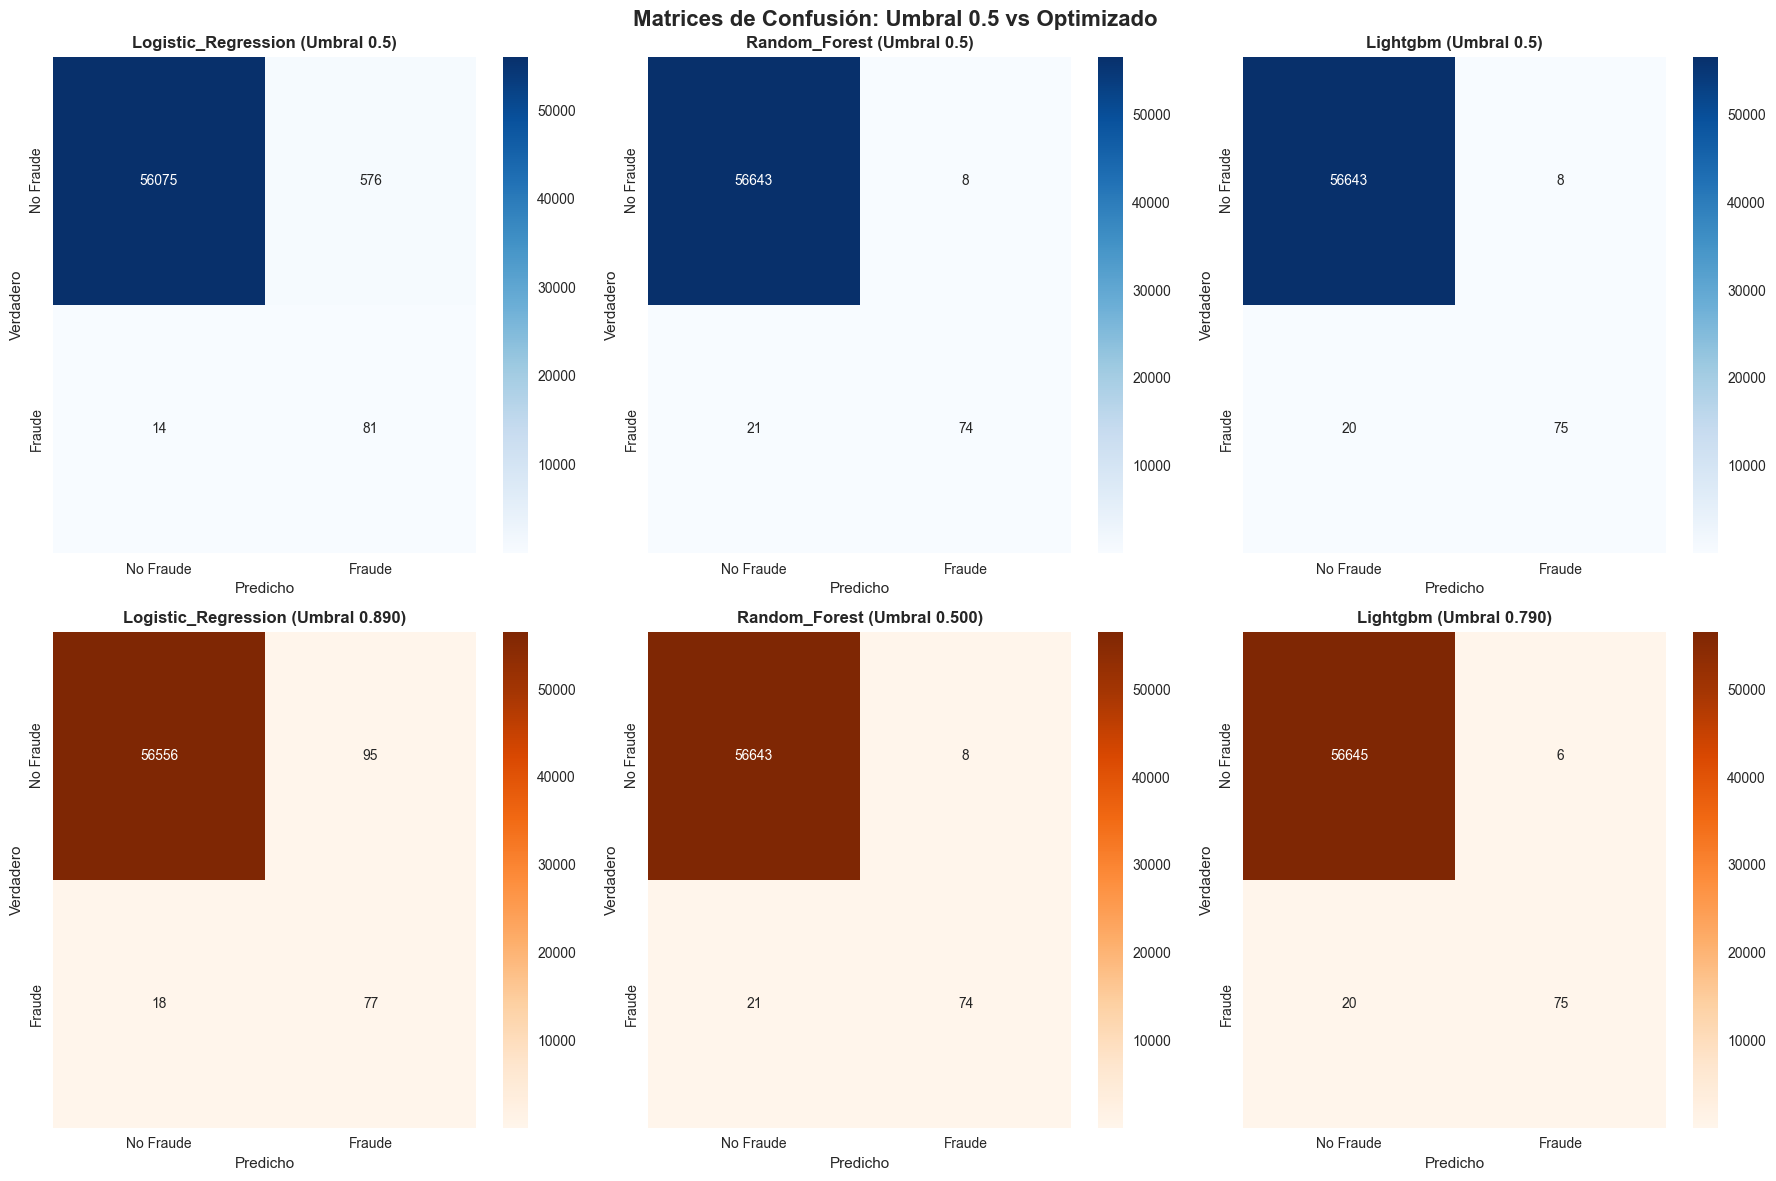

✅ Matrices de confusión guardadas


In [14]:
# Generar matrices de confusión
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, model_name in enumerate(models.keys()):
    # Matriz de confusión con umbral 0.5
    cm_05 = confusion_matrix(y_test, predictions[model_name])
    sns.heatmap(cm_05, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No Fraude', 'Fraude'],
                yticklabels=['No Fraude', 'Fraude'])
    axes[i].set_title(f'{model_name.title()} (Umbral 0.5)', fontweight='bold')
    axes[i].set_ylabel('Verdadero')
    axes[i].set_xlabel('Predicho')
    
    # Matriz de confusión con umbral optimizado
    threshold_opt = optimized_thresholds[model_name]['f1']['threshold']
    y_pred_opt = (probabilities[model_name] >= threshold_opt).astype(int)
    cm_opt = confusion_matrix(y_test, y_pred_opt)
    
    sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Oranges', ax=axes[i+3],
                xticklabels=['No Fraude', 'Fraude'],
                yticklabels=['No Fraude', 'Fraude'])
    axes[i+3].set_title(f'{model_name.title()} (Umbral {threshold_opt:.3f})', fontweight='bold')
    axes[i+3].set_ylabel('Verdadero')
    axes[i+3].set_xlabel('Predicho')

plt.suptitle('Matrices de Confusión: Umbral 0.5 vs Optimizado', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/confusion_matrices/confusion_matrices_comparison.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("✅ Matrices de confusión guardadas")

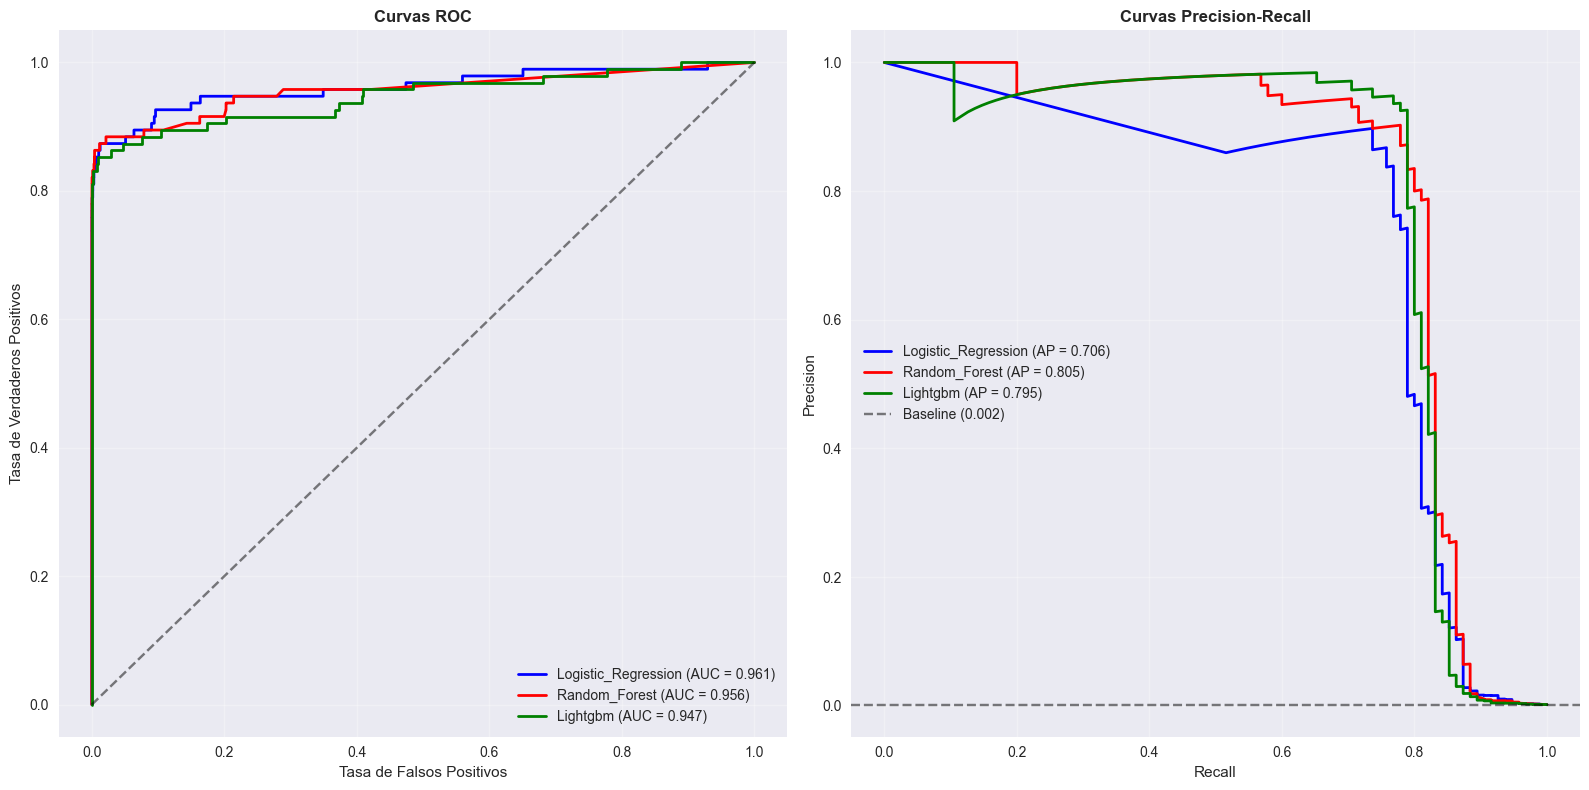

✅ Curvas ROC y PR guardadas


In [15]:
# Curvas ROC y Precision-Recall
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

colors = ['blue', 'red', 'green']

# Curva ROC
for i, model_name in enumerate(models.keys()):
    y_prob = probabilities[model_name]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    ax1.plot(fpr, tpr, color=colors[i], linewidth=2,
             label=f'{model_name.title()} (AUC = {auc_score:.3f})')

ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax1.set_xlabel('Tasa de Falsos Positivos')
ax1.set_ylabel('Tasa de Verdaderos Positivos')
ax1.set_title('Curvas ROC', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Curva Precision-Recall
for i, model_name in enumerate(models.keys()):
    y_prob = probabilities[model_name]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    
    ax2.plot(recall, precision, color=colors[i], linewidth=2,
             label=f'{model_name.title()} (AP = {pr_auc:.3f})')

# Línea base (proporción de positivos)
baseline = y_test.mean()
ax2.axhline(y=baseline, color='k', linestyle='--', alpha=0.5, label=f'Baseline ({baseline:.3f})')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Curvas Precision-Recall', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/curves/roc_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Curvas ROC y PR guardadas")

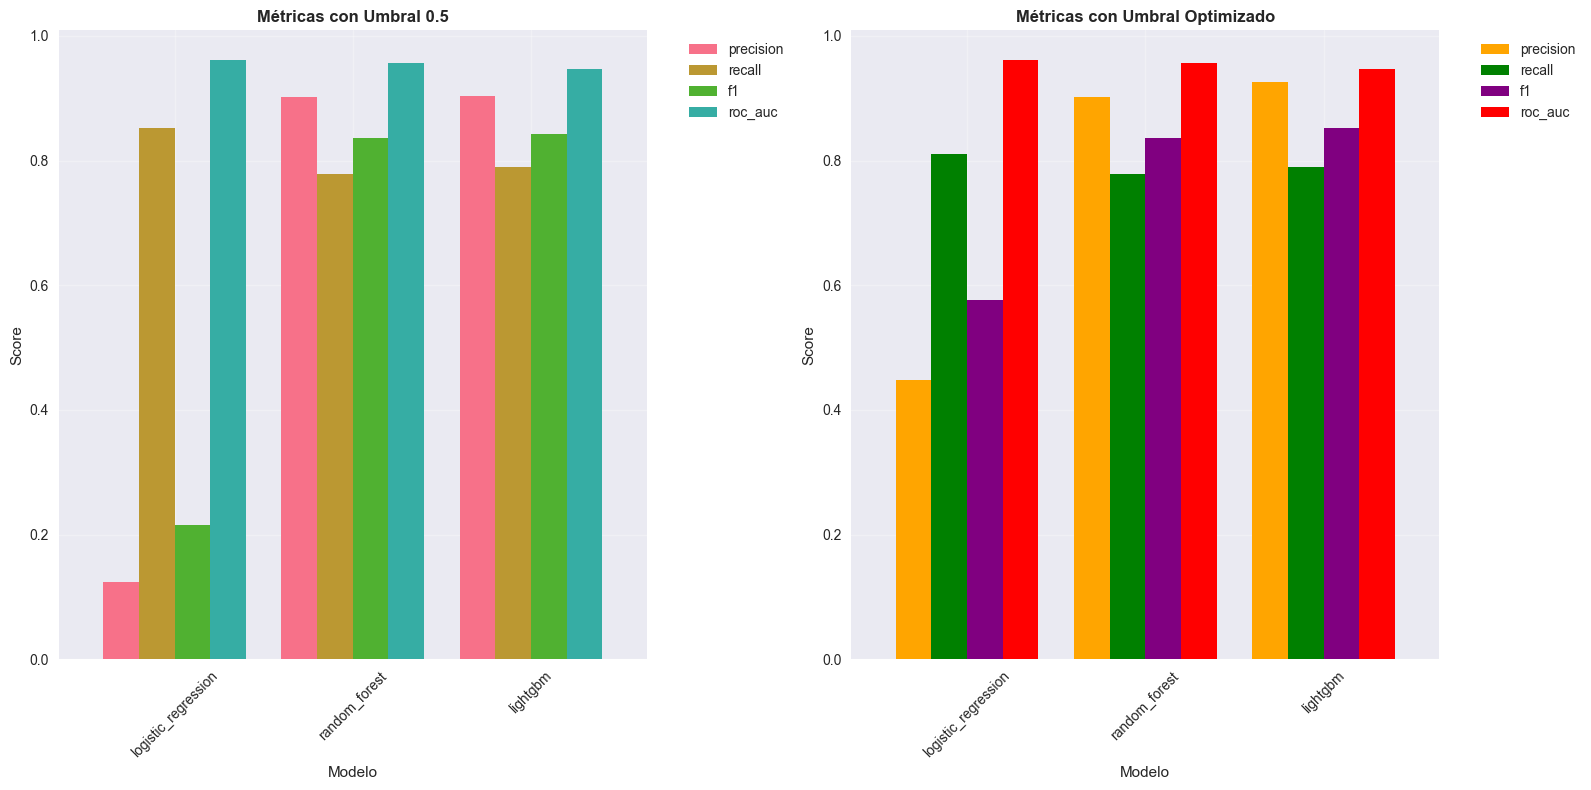

✅ Comparación de métricas y tablas guardadas


In [16]:
# Comparación de métricas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Métricas con umbral 0.5
metrics_comparison = metrics_df[['precision', 'recall', 'f1', 'roc_auc']]
metrics_comparison.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Métricas con Umbral 0.5', fontweight='bold')
ax1.set_ylabel('Score')
ax1.set_xlabel('Modelo')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Métricas con umbral optimizado
optimized_comparison = optimized_df[['precision', 'recall', 'f1', 'roc_auc']]
optimized_comparison.plot(kind='bar', ax=ax2, width=0.8, color=['orange', 'green', 'purple', 'red'])
ax2.set_title('Métricas con Umbral Optimizado', fontweight='bold')
ax2.set_ylabel('Score')
ax2.set_xlabel('Modelo')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('../results/figures/metrics/metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Guardar tablas
metrics_df.to_csv('../results/tables/metrics/basic_metrics.csv')
optimized_df.to_csv('../results/tables/metrics/optimized_metrics.csv')

# Guardar umbrales optimizados
threshold_df = pd.DataFrame({
    model: {metric: data['threshold'] for metric, data in thresholds.items()}
    for model, thresholds in optimized_thresholds.items()
}).T
threshold_df.to_csv('../results/tables/thresholds/optimized_thresholds.csv')

print("✅ Comparación de métricas y tablas guardadas")

## 6. Reporte Final

In [17]:
# Generar reporte final
print("📋 REPORTE FINAL DE EVALUACIÓN")
print("=" * 40)

# Encontrar el mejor modelo por métrica
best_models = {
    'f1': optimized_df['f1'].idxmax(),
    'precision': optimized_df['precision'].idxmax(),
    'recall': optimized_df['recall'].idxmax(),
    'roc_auc': optimized_df['roc_auc'].idxmax()
}

print("🏆 MEJORES MODELOS POR MÉTRICA:")
for metric, model in best_models.items():
    score = optimized_df.loc[model, metric]
    print(f"   {metric.upper()}: {model.title()} ({score:.4f})")

# Modelo recomendado (basado en F1-score)
recommended_model = best_models['f1']
recommended_threshold = optimized_thresholds[recommended_model]['f1']['threshold']

print(f"\n🎯 MODELO RECOMENDADO: {recommended_model.title()}")
print(f"   Umbral optimizado: {recommended_threshold:.3f}")
print(f"   F1-Score: {optimized_df.loc[recommended_model, 'f1']:.4f}")
print(f"   ROC-AUC: {optimized_df.loc[recommended_model, 'roc_auc']:.4f}")

# Crear reporte detallado
report = {
    'timestamp': datetime.now().isoformat(),
    'test_set_size': len(y_test),
    'test_distribution': y_test.value_counts().to_dict(),
    'models_evaluated': list(models.keys()),
    'basic_metrics': metrics_df.to_dict(),
    'optimized_metrics': optimized_df.to_dict(),
    'optimized_thresholds': optimized_thresholds,
    'best_models_by_metric': best_models,
    'recommended_model': {
        'name': recommended_model,
        'threshold': recommended_threshold,
        'metrics': optimized_df.loc[recommended_model].to_dict()
    }
}

# Guardar reporte
with open('../results/reports/evaluation_report.json', 'w') as f:
    json.dump(report, f, indent=2)

print("\n💾 Reporte guardado en: ../results/reports/evaluation_report.json")
print("\n" + "=" * 40)
print("🎉 EVALUACIÓN COMPLETADA EXITOSAMENTE")
print("=" * 40)

📋 REPORTE FINAL DE EVALUACIÓN
🏆 MEJORES MODELOS POR MÉTRICA:
   F1: Lightgbm (0.8523)
   PRECISION: Lightgbm (0.9259)
   RECALL: Logistic_Regression (0.8105)
   ROC_AUC: Logistic_Regression (0.9608)

🎯 MODELO RECOMENDADO: Lightgbm
   Umbral optimizado: 0.790
   F1-Score: 0.8523
   ROC-AUC: 0.9469

💾 Reporte guardado en: ../results/reports/evaluation_report.json

🎉 EVALUACIÓN COMPLETADA EXITOSAMENTE
